# 1) Python and SQLite

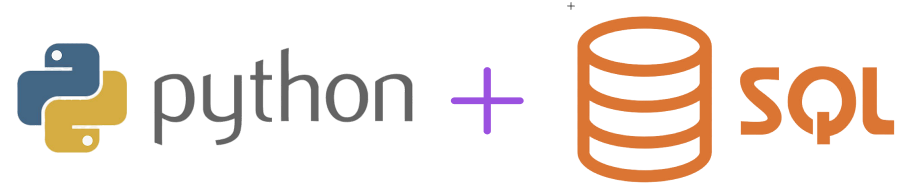

By the end of this lesson, you'll be able to do the following:

* Connect to an SQLite database using Python and the **sqlite3** library

* Execute SQL queries on an SQLite database using Python

* Convert data from an SQLite database to a pandas dataframe

During this course, we'll be using the **World Population Database**, a public dataset that contains information on the population and demographics of countries around the world. You can look at information about the table we'll be working with in the `population_table_fields.csv` file. Your task is to create a column chart of population by year for the country you live in. Since SQLite doesn't have data visualization capabilities, we'll have to pull the data into Python to create the data visualization.

# 2) Connecting to the database

To query an SQLite database from Python, we first need to establish a connection to the database using the sqlite3 library. The sqlite3 library provides a convenient way to interact with SQLite databases in Python, allowing us to execute SQL queries, retrieve data, and manage transactions.

We'll first connect to the database with the code shown below.

```sql
import sqlite3
conn = sqlite3.connect('example.db')
conn.close()
```

In the code above, we first import the `sqlite3` library. We then create a connection object by calling the `connect()` method and passing in the name of the database file `example.db`. This creates a new connection to the database file. Lastly, we close the connection by calling the `close()` method on the connection object. It's important to always close the connection when we're done working with the database to avoid data corruption or other issues.

Note that while we'll be working with an SQLite database in this lesson, the processes and much of the syntax will apply when using other database connections.

Let's start by connecting to the database.

## Instructions

1. Import the `sqlite3` library.

1. Use the `connect()` method to establish a connection to the database. The database file name is `world_population.db`.

1. Close the connection.

In [1]:
import sqlite3
conn = sqlite3.connect('world_population.db')
conn.close()

# 3) Executing Queries

Once we've established a connection to a SQLite database from Python, we can execute SQL queries on the database using pandas read_sql_query() method. The `read_sql_query()` method allows us to execute SQL queries and retrieve the results directly into a pandas DataFrame object.

Here's an example of how to execute a `SELECT` query on an SQLite database from Python using `pandas`:

```python
import pandas as pd
import sqlite3

# Establish a connection to the database
conn = sqlite3.connect('world_population.db')

# Execute a SELECT query and read results into a DataFrame
query = "SELECT * FROM population;"
results = pd.read_sql_query(query, conn)
```

The code above connects to the `world_population.db` database, executes a `SELECT` query that retrieves all columns for the first ten rows and reads the results into a pandas dataframe. While SQLite doesn't require adding a semi-colon to the end of a query, it's considered best practice. Note that the `read_sql_query()` requires two arguments: the **query** and the **connection** variable.

See [read_sql_query()](https://pandas.pydata.org/docs/reference/api/pandas.read_sql_query.html) documentation.

## Instructions

1. Import the `pandas` and `sqlite3` libraries.

1. Establish a connection to the `world_population.db` database.

1. Create a query variable named `query` that retrieves the population of all countries in 2020. Include the `CountryName` and `Population` fields. Limit the results to 10 rows.

1. Read the query results into a pandas dataframe using the `pd.read_sql_query()` method. Assign it to a variable called `results`.

1. Print the dataframe to the console.

1. Close the database connection.


In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('world_population.db')

query = "SELECT CountryName, Population FROM population Population WHERE Year = 2020 LIMIT 10"

results = pd.read_sql_query(query,conn)
print(results)
conn.close()

           CountryName  Population
0          Afghanistan   38972.230
1              Albania    2866.848
2              Algeria   43451.666
3       American Samoa      46.189
4              Andorra      77.700
5               Angola   33428.486
6             Anguilla      15.585
7  Antigua and Barbuda      92.664
8            Argentina   45036.032
9              Armenia    2805.608


# 4) Your Task

Now we can revisit our original task to **create a column chart of the population by year for your country**. Let's write a query to look at the data we'll plot.

We can use multiline strings to make our code more readable when writing longer queries. Multiline strings are strings that span multiple lines and are enclosed in triple quotes (''' or """). Using multiline strings allows us to write SQL queries with line breaks and indentation, making our code easier to read and understand.

We can use multiline strings to make our code more readable when writing longer queries. Multiline strings are strings that span multiple lines and are enclosed in triple quotes (''' or """). Using multiline strings allows us to write SQL queries with line breaks and indentation, making our code easier to read and understand.

Here's an example of how to use a multiline string to write an SQL query:

```python
# Define the SQL query as a multiline string
query = '''
    SELECT *
      FROM mytable
     WHERE mycolumn = 'myvalue';
'''

```

## Instructions

1. Create a variable named `query` and write a `SELECT` query that retrieves the population data for your country for all years. Include the `CountryName`, `Year`, and `Population` columns in the results.

1. Format your query so each clause is on a different line.

1. Print the first ten rows of the results.

In [5]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('world_population.db')

# Write a SELECT query
query = """
    SELECT CountryName, Year, Population 
      FROM population 
     WHERE CountryName = 'Brazil';
     """
# Execute the query
results = pd.read_sql_query(query,conn)

# Print the results
print(results.head(10))

# Close the database connection
conn.close()

  CountryName  Year  Population
0      Brazil  1950   53955.360
1      Brazil  1951   55591.058
2      Brazil  1952   57283.338
3      Brazil  1953   59025.679
4      Brazil  1954   60827.590
5      Brazil  1955   62701.030
6      Brazil  1956   64644.886
7      Brazil  1957   66660.892
8      Brazil  1958   68735.926
9      Brazil  1959   70880.820


# 5) Creating a Data Visualization

Below is an example of creating a bar chart using matplotlib of the top ten countries by population in 2022.

First, we'll query the database and store the results in a pandas dataframe.

```python
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('world_population.db')

# Execute a SELECT query
query = """
    SELECT CountryName, CountryCode, Population 
      FROM population 
     WHERE Year=2022
     ORDER BY Population DESC
     LIMIT 10;
    """

# Retrieve the results of the query as a pandas dataframe
data = pd.read_sql_query(query, conn)
```

We'll use the results to create the bar chart with the relevant title and labels.

```python
# Create a bar chart of the top 10 countries by population
plt.bar(data['CountryCode'], data['Population'])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 10 Countries by Population in 2022')

# Show the plot
plt.show()

# Close the database connection
conn.close()
```

In this example, we executed a `SELECT` query to retrieve the population for all countries in `2022` as a pandas dataframe. Then we sorted the data by population to get the top ten countries. Finally, we created a bar chart of the top ten countries by population using matplotlib and showed the plot. Note that it includes the `CountryCode` field to make the plot more readable. Here's the resulting plot:

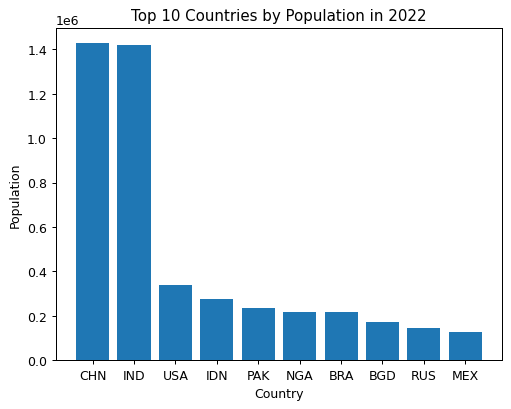

## Instructions

1. Execute a `SELECT` query named query that retrieves the population data for `United States of America` for all years.

1. Retrieve the results of the query as a pandas dataframe.

1. Create a column chart of the population data for the country by year.

1. Add axis labels and a title to the plot.

    * For consistency with our system, label the X-axis as `Year`, the Y-axis as `Population`, and set the title to `Population of the United States of America by Year`

1. Show the plot.




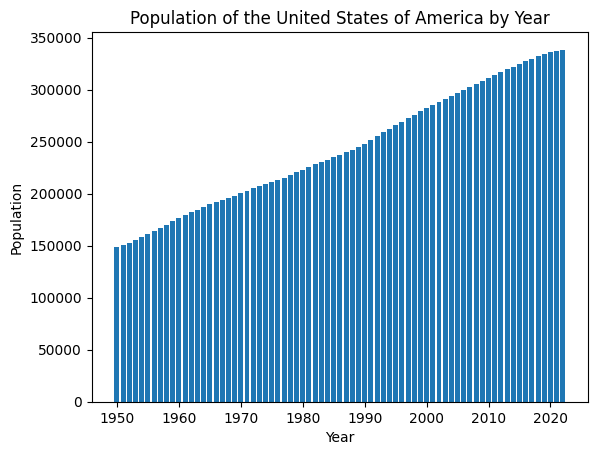

In [7]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

#Connect to the SQLite database
conn = sqlite3.connect("world_population.db")

#Execute a SELECT query
query = """
            SELECT CountryName, Year, Population
              FROM population
              WHERE CountryName = 'United States of America'
        """

results = pd.read_sql_query(query,conn)

plt.bar(results['Year'], results['Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of the United States of America by Year')
plt.show()

# 6) Putting All Together

This exercise will allow you to practice writing a query using multiple tables in the World Population database. You'll select data from the `population` and `country_mapping` tables to find the top ten subregions with the most significant change in population from 2010 to 2020. You'll also create a horizontal bar chart to visualize the results. 

## Instructions

1. Write a query that returns the sum of the `population.popchange` column by `country_mapping.SubRegion`.

1. Group results by the `Region` and `SubRegion` columns.

1. Limit the data to `2010` to `2020`.

1. Only return the **ten sub-regions** with the most significant change in population during those years.

1. Create a horizontal bar chart with `SubRegion` on the y-axis and the sum of `PopChange` on the x-axis.


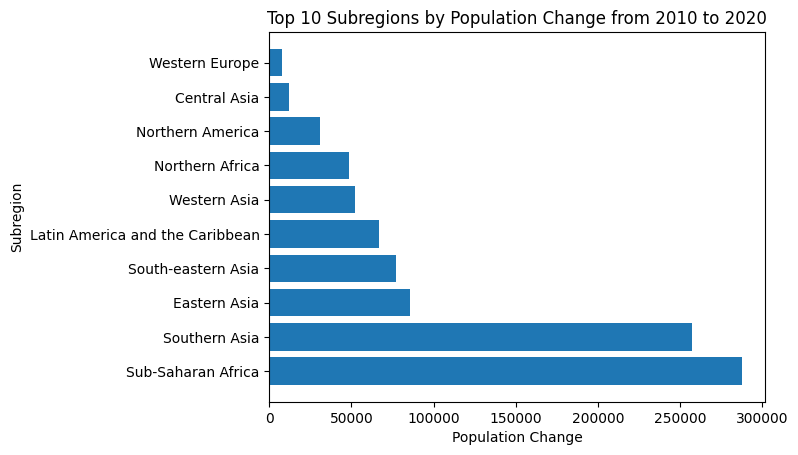

In [8]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

#Connect to the SQLite database
conn = sqlite3.connect("world_population.db")

#Execute a SELECT query
query = """
            SELECT country_mapping.Region, country_mapping.SubRegion,
                   SUM(population.PopChange) AS TotalPopChange
              FROM population
              JOIN country_mapping
                ON population.CountryCode = country_mapping.CountryCode
              WHERE Year >= 2010
              and   Year <= 2020
              GROUP BY country_mapping.region, country_mapping.Subregion
              ORDER BY TotalPopChange DESC
              LIMIT 10
        """

results = pd.read_sql_query(query,conn)
conn.close()

plt.barh(results['SubRegion'],results['TotalPopChange'])
plt.xlabel('Population Change')
plt.ylabel('Subregion')
plt.title('Top 10 Subregions by Population Change from 2010 to 2020')
plt.show()




